In [1]:
#Magic command to include matplotlib graphs in notebook
%matplotlib inline


#Importing necessary libraries
import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plot
from sklearn.cluster import KMeans

#Dataloader function
def load_mnist(path, kind='train'):
  import os
  import gzip

  """Load MNIST data from `path`"""
  labels_path = os.path.join(path,
                                '%s-labels-idx1-ubyte.gz'
                                % kind)
  images_path = os.path.join(path,
                                '%s-images-idx3-ubyte.gz'
                                % kind)
  with gzip.open(labels_path, 'rb') as lbpath:
    labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                                offset=8)

  with gzip.open(images_path, 'rb') as imgpath:
    images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                                offset=16).reshape(len(labels), 784)

  return images, labels

#To load the dataset from file in corresponding variables
# x_train, y_train = load_mnist('data/fashion', kind='train')
# x_test, y_test = load_mnist('data/fashion', kind='t10k')

#Loading the dataset directly from Keras' library and reshaping to vectorize it
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2])

#Verifying the dataset dimensions
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
#Defining KMeans and fitting it with different number of cluster to observe the "elbow" point
from sklearn.cluster import MiniBatchKMeans
error = []
for i in range(6, 16):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=600, n_init=20, random_state=0)
    kmeans.fit(x_train)
    error.append(kmeans.inertia_)
    print("Completed Mini-batch KMeans with #clusters = ", i)

Completed Mini-batch KMeans with #clusters =  6
Completed Mini-batch KMeans with #clusters =  7
Completed Mini-batch KMeans with #clusters =  8
Completed Mini-batch KMeans with #clusters =  9
Completed Mini-batch KMeans with #clusters =  10
Completed Mini-batch KMeans with #clusters =  11
Completed Mini-batch KMeans with #clusters =  12
Completed Mini-batch KMeans with #clusters =  13
Completed Mini-batch KMeans with #clusters =  14
Completed Mini-batch KMeans with #clusters =  15


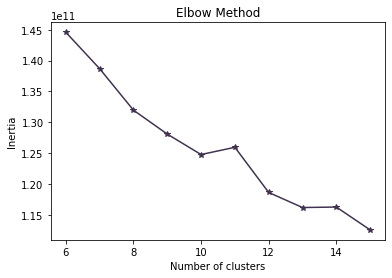

<Figure size 432x288 with 0 Axes>

In [3]:
#Plotting the graph between different number of clusters and within-cluster sum-of-squares (inertia)
plot.plot(range(6, 16), error, color='#41324f', marker='*')
plot.title('Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('Inertia')
graph = plot.gcf()
plot.show()
plot.draw()
graph.savefig('kmeans_elbow.png', dpi=300)

In [0]:
#Declaring, fitting and predicting the clusters for the test dataset
kmeans = MiniBatchKMeans(n_clusters=10, init='k-means++', max_iter=600, n_init=20, random_state=0)
y_pred = kmeans.fit_predict(x_test)

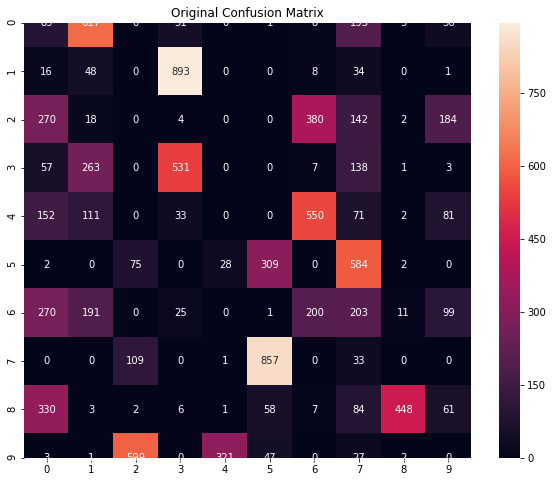

In [5]:
#Observing the confusion matrix
#It can be observed that the clusters are not correctly aligned w.r.t the labels
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusionmatrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusionmatrix, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plot.figure(figsize = (10, 8))
plot.title('Original Confusion Matrix')
cm_original = plot.gcf()
fig = sns.heatmap(df_cm, annot=True, fmt='g')
cm_original.savefig('original_cm.png', dpi=300)

In [6]:
#Using Hungarian algorithm to compute reordered confusion matrix
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    max_value = np.max(cm)
    return (- cm + max_value)

cm = confusion_matrix(y_test, y_pred)
indices = linear_assignment(_make_cost_m(cm))
number = [element[1] for element in sorted(indices, key=lambda x: x[0])]
reordered_cm = cm[:, number]

print("Accuracy: ", (np.trace(reordered_cm) / np.sum(reordered_cm))*100, "%")

Accuracy:  50.019999999999996 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


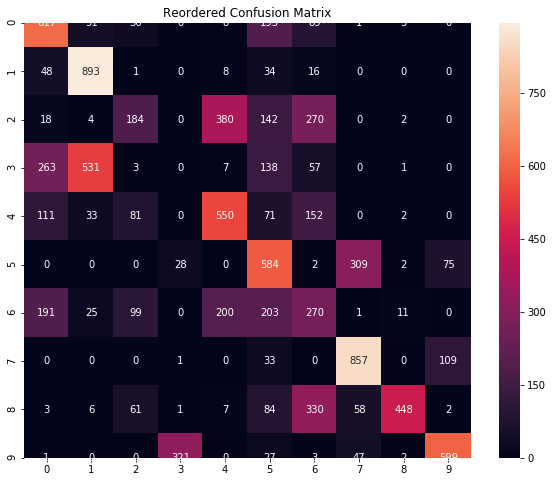

In [7]:
#Visualizing reordered confusion matrix

import seaborn as sns

df_cm = pd.DataFrame(reordered_cm, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plot.figure(figsize = (10, 8))
plot.title('Reordered Confusion Matrix')
# plot.xlabel('')
# plot.ylabel('')
cm_reordered = plot.gcf()
fig = sns.heatmap(df_cm, annot=True, fmt='g')
# fig.pivot('Predicted labels', 'True labels')
cm_reordered.savefig('reordered_cm.png', dpi=300)